Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                768       
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 1s 10ms/step - loss: 2.5074 - accuracy: 0.3705 - val_loss: 1.4353 - val_accuracy: 0.4219
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 1.1940 - accuracy: 0.5044 - val_loss: 1.3127 - val_accuracy: 0.4531


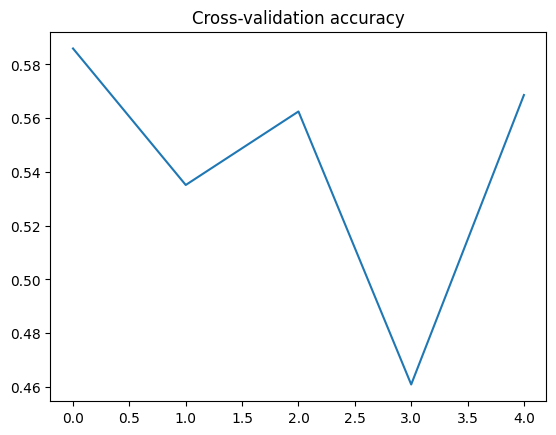

Test accuracy: 0.5375000238418579


In [9]:
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv')

# 데이터를 특성과 타겟으로 분리
X = df.iloc[:, 0:11]
Y = df.iloc[:, 11]
Y = pd.get_dummies(Y)

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Early Stopping Callback 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 교차 검증을 위한 KFold 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# 모델 생성 및 요약을 한 번만 출력
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=11, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 처음 생성한 모델의 요약을 출력
model = create_model()
model.summary()

# 교차 검증 수행
for train_idx, val_idx in kfold.split(X_train):
    # 각 fold마다 새로운 모델 생성
    fold_model = create_model()

    # 모델 훈련 및 평가
    fold_model.fit(X_train.iloc[train_idx], Y_train.iloc[train_idx], epochs=200, batch_size=32,
                   validation_data=(X_train.iloc[val_idx], Y_train.iloc[val_idx]),
                   callbacks=[early_stopping], verbose=1)
    scores = fold_model.evaluate(X_train.iloc[val_idx], Y_train.iloc[val_idx], verbose=0)
    cv_scores.append(scores[1])

# 교차 검증 결과 시각화
plt.plot(cv_scores)
plt.title('Cross-validation accuracy')
plt.show()

# 테스트 데이터에 대한 최종 평가
test_score = fold_model.evaluate(X_test, Y_test, verbose=0)
print(f'Test accuracy: {test_score[1]}')
